In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

X_train.shape,X_test.shape 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train[0].shape

(28, 28)

In [9]:
import numpy as np
import pandas as pd

In [12]:
np.min(X_train[0]),np.max(X_train[0])

(np.uint8(0), np.uint8(255))

In [13]:
import matplotlib.pyplot as plt

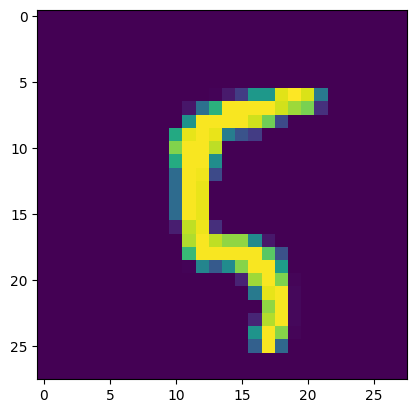

In [19]:
plt.figure()
plt.imshow(X_train[100])
plt.show()

In [20]:
X_train = X_train / 255
X_test = X_test / 255

In [22]:
X_train[0].max()

np.float64(1.0)

- **Input Layer:** 784 pixels
- **Hidden Layer 1:** 128 Perceptrons
- **Output Layer:** 10 digits

Flatten the 28x28 image

In [44]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [47]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8596 - loss: 0.4874 - val_accuracy: 0.9614 - val_loss: 0.1353
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9646 - loss: 0.1172 - val_accuracy: 0.9657 - val_loss: 0.1147
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9752 - loss: 0.0827 - val_accuracy: 0.9674 - val_loss: 0.1095
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9802 - loss: 0.0642 - val_accuracy: 0.9679 - val_loss: 0.1097
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9855 - loss: 0.0437 - val_accuracy: 0.9724 - val_loss: 0.0964
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9874 - loss: 0.0372 - val_accuracy: 0.9725 - val_loss: 0.1014
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9913 - loss: 0.0269 - val_accuracy: 0.9735 - val_loss: 0.0981
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9929 - los

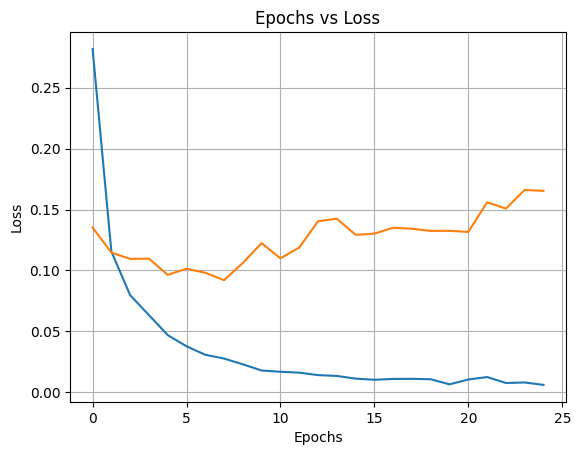

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.grid(True)
plt.show()

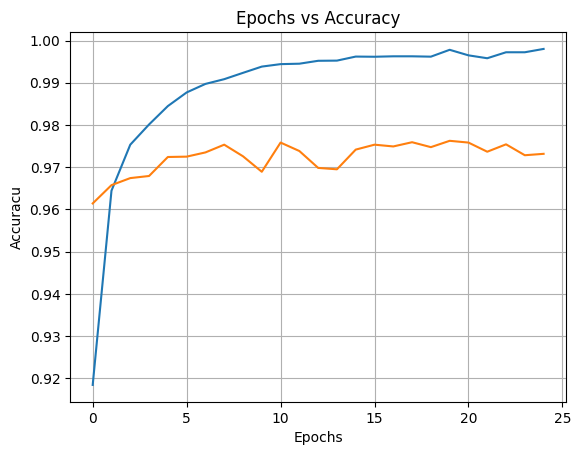

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracu")
plt.title("Epochs vs Accuracy")
plt.grid(True)
plt.show()

In [51]:
y_prob = model.predict(X_test)

y_prob 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.6496068e-17, 1.6362286e-14, 2.2273955e-11, ..., 1.0000000e+00,
        3.3015538e-15, 1.4845021e-10],
       [6.2535511e-22, 1.7149165e-14, 1.0000000e+00, ..., 3.1169159e-24,
        7.4944955e-13, 3.6399478e-30],
       [2.4290706e-14, 9.9999976e-01, 7.8717397e-09, ..., 2.9333000e-07,
        4.6818105e-09, 4.2205506e-12],
       ...,
       [6.1310475e-31, 7.6954465e-18, 8.4370883e-30, ..., 1.5405315e-18,
        1.4037988e-19, 1.4406437e-10],
       [7.8361750e-29, 1.8304545e-31, 2.0481942e-35, ..., 7.0386497e-22,
        5.5120869e-12, 6.5949624e-32],
       [1.4293800e-19, 3.4962449e-31, 3.4234080e-23, ..., 6.2345111e-32,
        2.0267755e-18, 6.0678310e-23]], dtype=float32)

In [52]:
y_pred = np.argmax(y_prob,axis=1)

y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
score = accuracy_score(y_test,y_pred)

score * 100

97.72

In [59]:
model.predict(X_test[100].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([6])

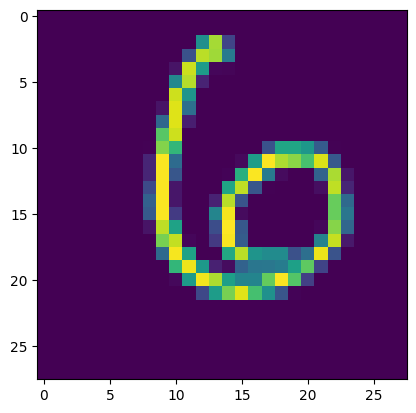

In [60]:
plt.imshow(X_test[100])